In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.lenses import lens_util
from mejiro.utils import util

In [2]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=True, suppress_output=False)

pipeline_dir='/data/bwedig/mejiro/pipeline_dev'


100%|██████████| 1148/1148 [00:14<00:00, 79.44it/s] 


Count: 22
('snrs=[282.0644050265251, 142.1639983561832, 132.8711975943573, '
 '104.95149376943228, 118.77078592964465, 117.32117415245936, '
 '105.68703671647238, 115.31090652132332, 133.02097851502455, '
 '134.3577229878264, 114.83426504301977, 111.89028140594829, '
 '115.41574574882891, 130.14509129572818, 145.25932210855922, '
 '107.80463036464106, 154.60846898925485, 122.95776491406117, '
 '140.59115632057643, 100.16307769459128, 118.09853699256766, '
 '104.15750699237815]')


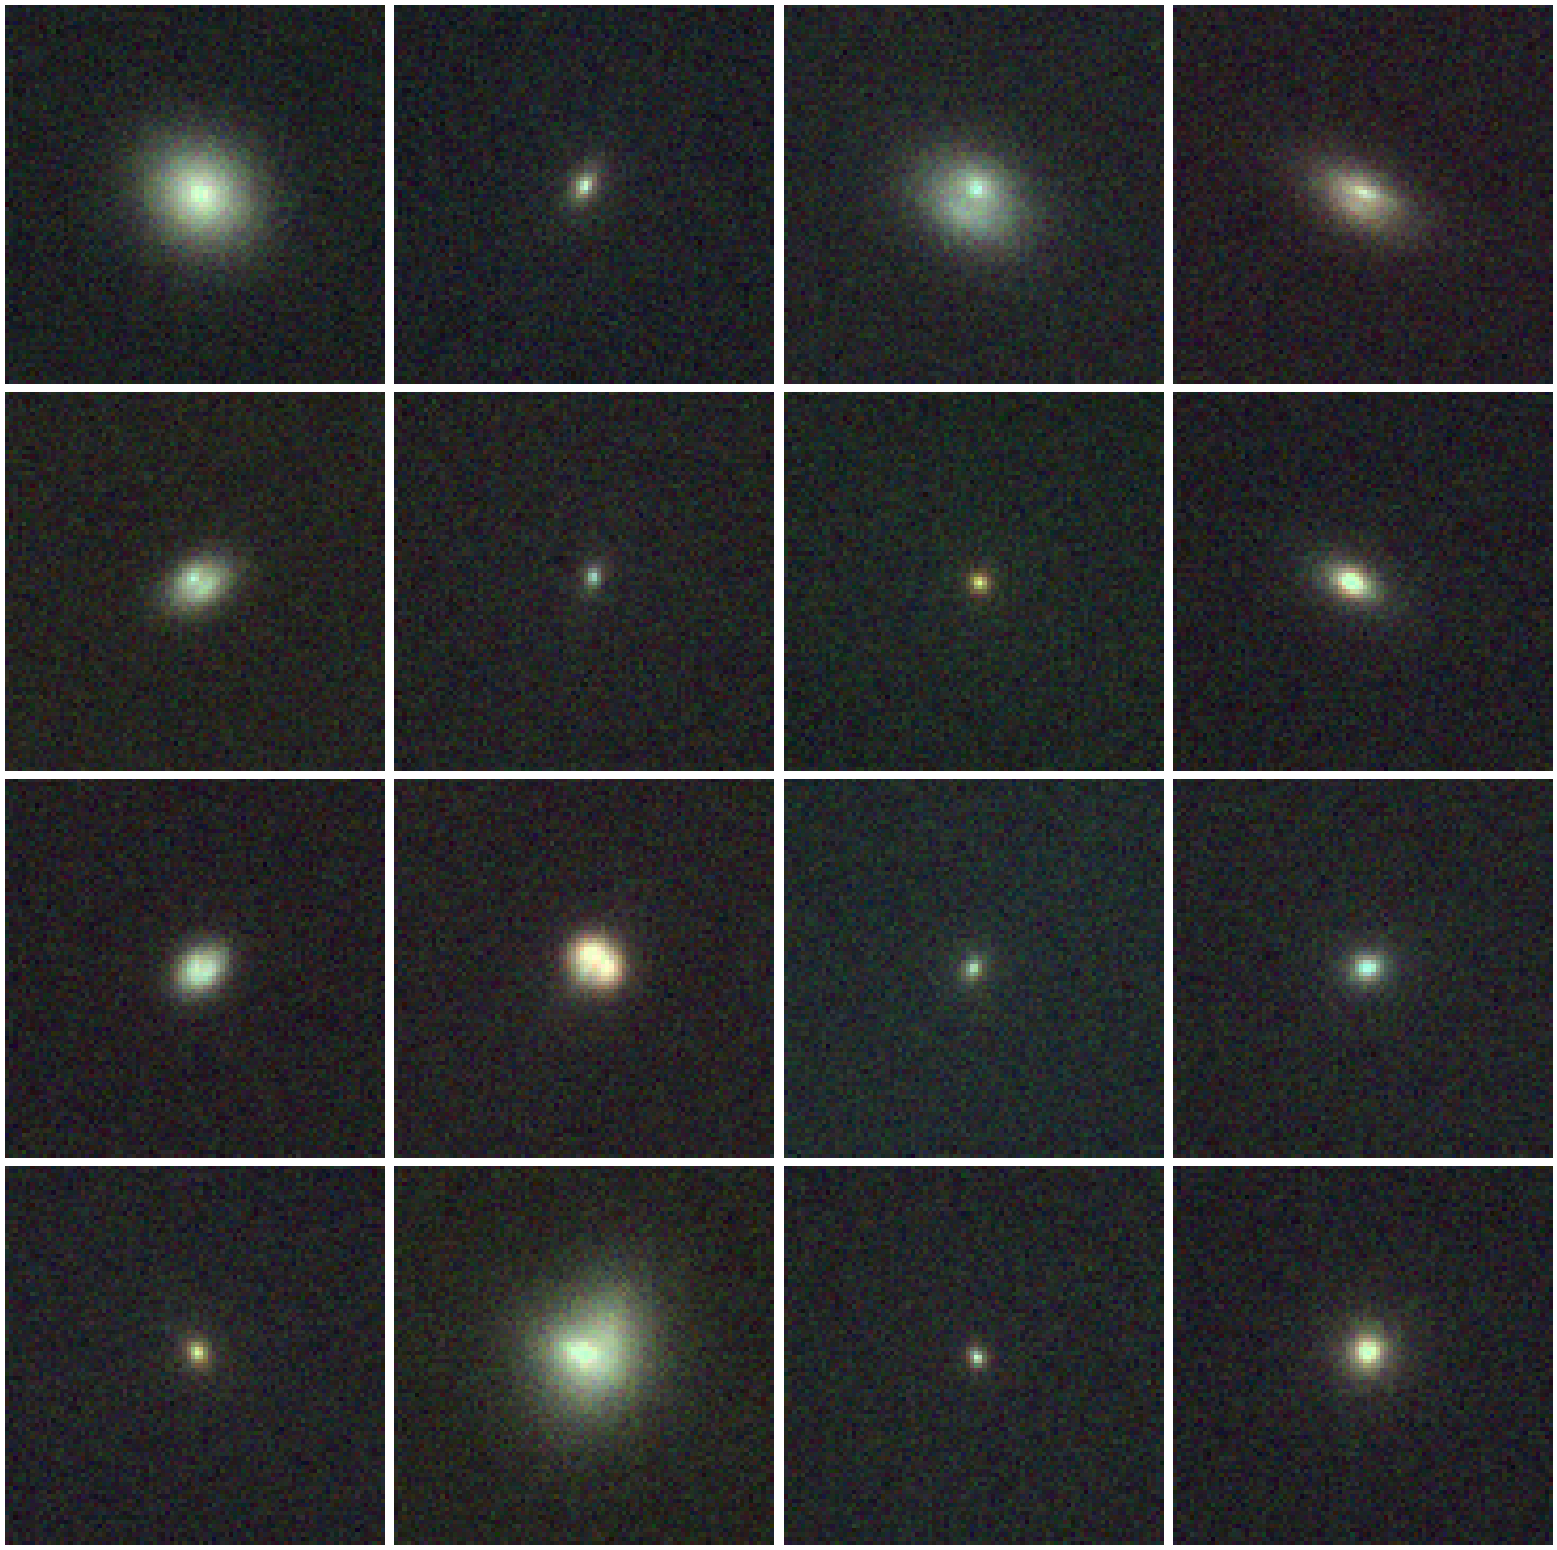

In [3]:
high_snr = [l for l in all_lenses if l.snr > 100]
print(f'Count: {len(high_snr)}')

uids = [l.uid for l in high_snr]
snrs = [l.snr for l in high_snr]
pprint(f'{snrs=}')

color = [lens_util.get_sample(pipeline_dir, index=uid, model=False)[2] for uid in uids]

plot.rgb_plot_grid(color, side=np.floor(np.sqrt(len(high_snr))).astype(int))